<a href="https://colab.research.google.com/github/bishtd78/MTH307datastructure/blob/main/idc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Components which affects the price of a Laptop**
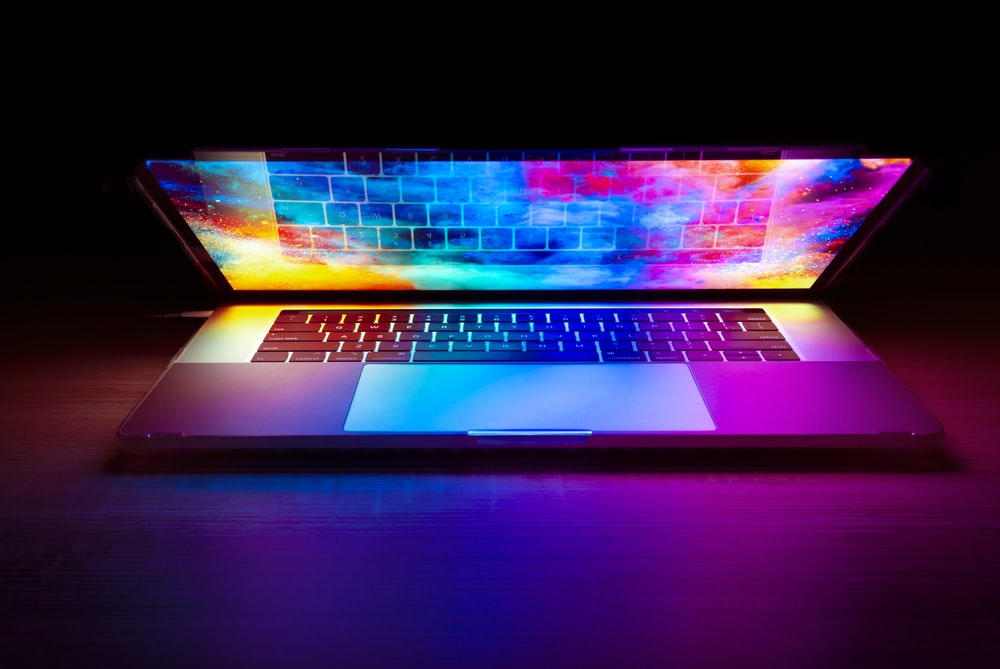
###*Deepak Bisht*
###*18031*


Being in the 21st-century laptop has been a necessity for life and almost every person has to make a decision regarding which laptop to buy. Everyone tries to have the best laptop at the most affordable price but the more expensive components increase the price of the machine. The question is which component has the biggest impact on the price? Using the laptop database, I have tried answering this question by exploring and creating a model of neural networks (Regression, because the price is predicted) which explains the price of a laptop depending on its component.

In [5]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K
import eli5
from eli5.sklearn import PermutationImportance
import io


plt.rcParams["figure.figsize"] = (18, 11.5)
plt.style.use('bmh')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'#f0f0f0'})

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

def plot_box(x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = df, y = y, x = x, order = order, linewidth = 1.2, color = color, **PROPS, flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

def plot_scatter(x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, size, alpha):
    ax = sns.scatterplot(data = df, y = y, x = x,linewidth = 1.2, color = color, s = size, alpha = alpha, marker = "o", edgecolor = "black")

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

# Data Analysis
For analysis, I have used python in its latest version. Pandas, NumPy, and repackages are used for data manipulation, matplotlib and seaborn for data visualization, and TensorFlow and Keras for creating a neural network model. In the beginning, I defined some functions for creating charts to improve work and reduce the amount of code and ensure consistency between the charts.

In [6]:
df = pd.read_csv('/content/laptop_price.csv',encoding='latin-1')
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


There are 1303 rows and 13 variables in the database. The columns detail the components of each laptop, including the business that made it, the product name, device type, screen size in inches, screen resolution, CPU, RAM, Memory, GPU, operating system, hardware weight, and price. Although there are no gaps in the data, modeling will necessitate preparation (e.g. format change, recoding, removal of unnecessary variables). We begin with data investigation, checking the price for each feature of the laptop one by one.

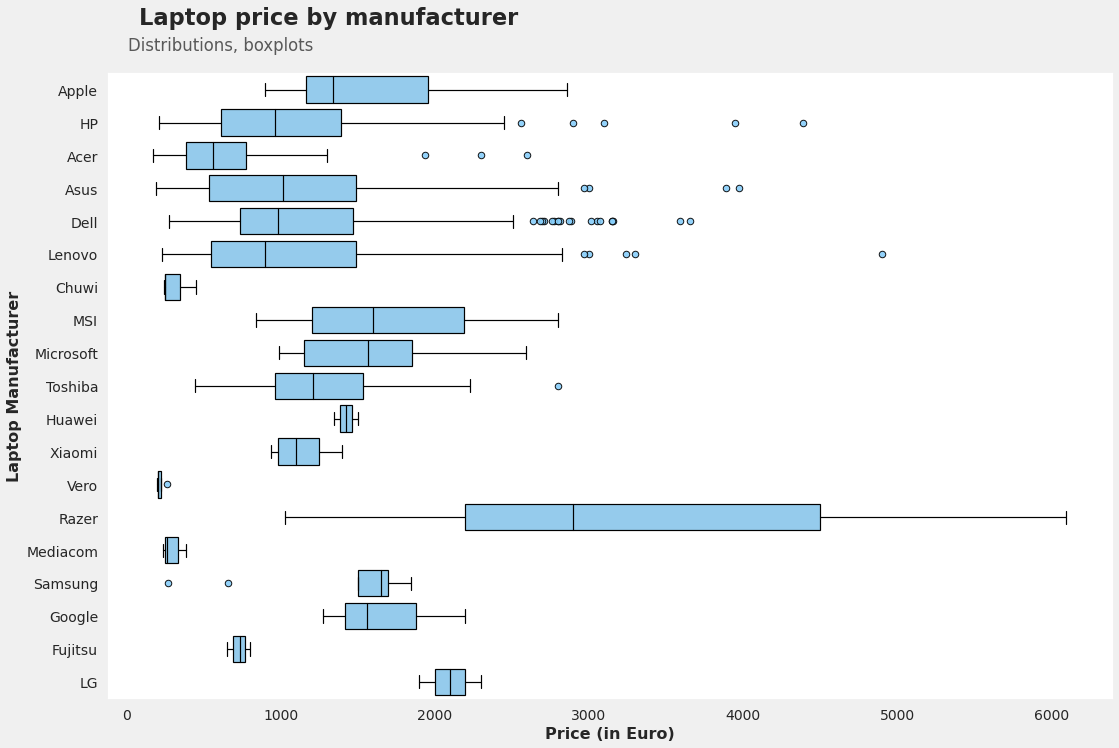

In [7]:
plot_box(x = "Price_euros", y = "Company", xlabel = 'Price (in Euro)', ylabel = "Laptop Manufacturer", title = "Laptop price by manufacturer",subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

I started with the manufacturers: out of over 1,300 laptops, 19 stand out, with Dell and Lenovo being the most popular (297 devices each). Razer laptops have the highest median price - approximately 3,000 euros - but keeping in mind that this is only a tiny sample of the company's laptops (only 7). The cheapest devices are offered by Chuwi, Vero, and Medicom. For most brands, the sprinkler price distribution is regular, but some of them have atypical values because of their high prices (luxury products relative to others), such as Lenovo or HP. The company that produces the equipment seems to be a variable that can vary the price, not only after looking at the chart, but also knowing the strength of brand and recognition.

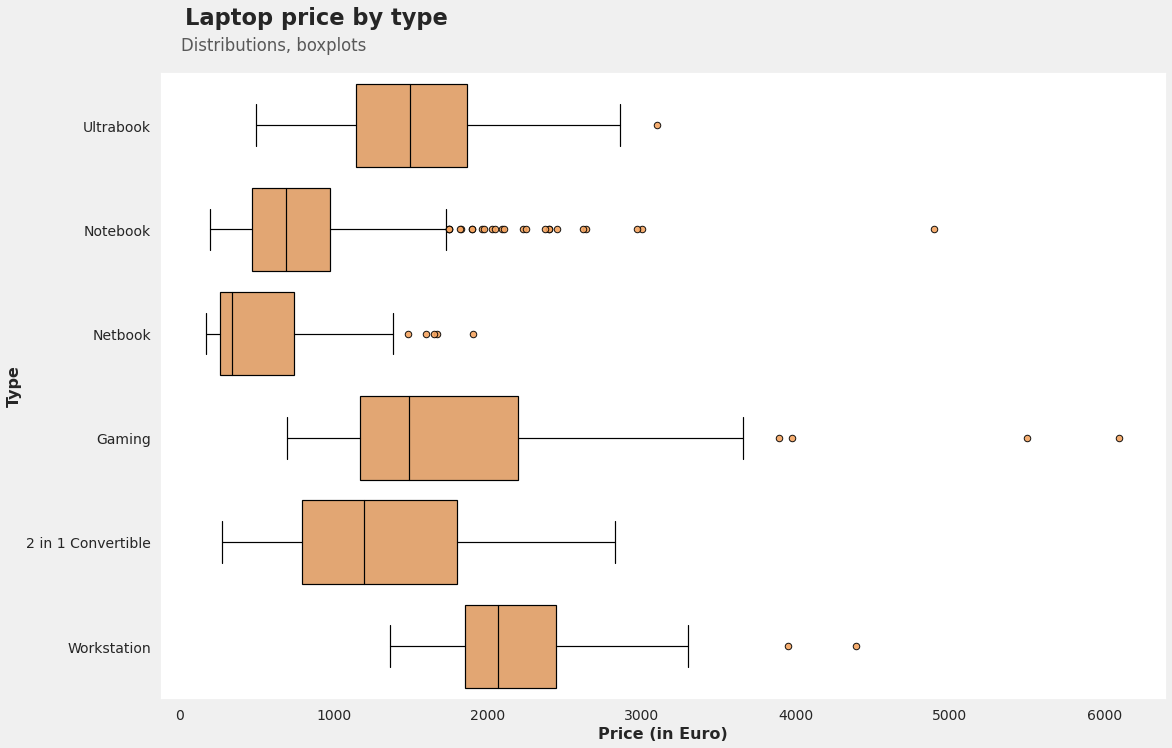

In [8]:
plot_box(x = "Price_euros", y = "TypeName", xlabel = 'Price (in Euro)', ylabel = "Type", title =  "Laptop price by type", subtitle = "Distributions, boxplots", color = "sandybrown", title_position = 0.155, subtitle_position = 0.113)

The distributions by type of equipment are depicted in the next graph. The database contains six different sorts of devices, the most prevalent of which is a notebook (over 50 percent ). The average price of notebooks and netbooks is the lowest, while the average price of workstations is the highest. The high price can also be seen in gaming equipment (not only a huge median but also both laptops with a price of more than 5,000 dollars), which is due to the high cost of excellent graphics cards, which are an indispensable component of such laptops. Although the type of equipment may have an impact on the price, we doubt the apparent link (workstations or gaming usually have better components than notebooks).

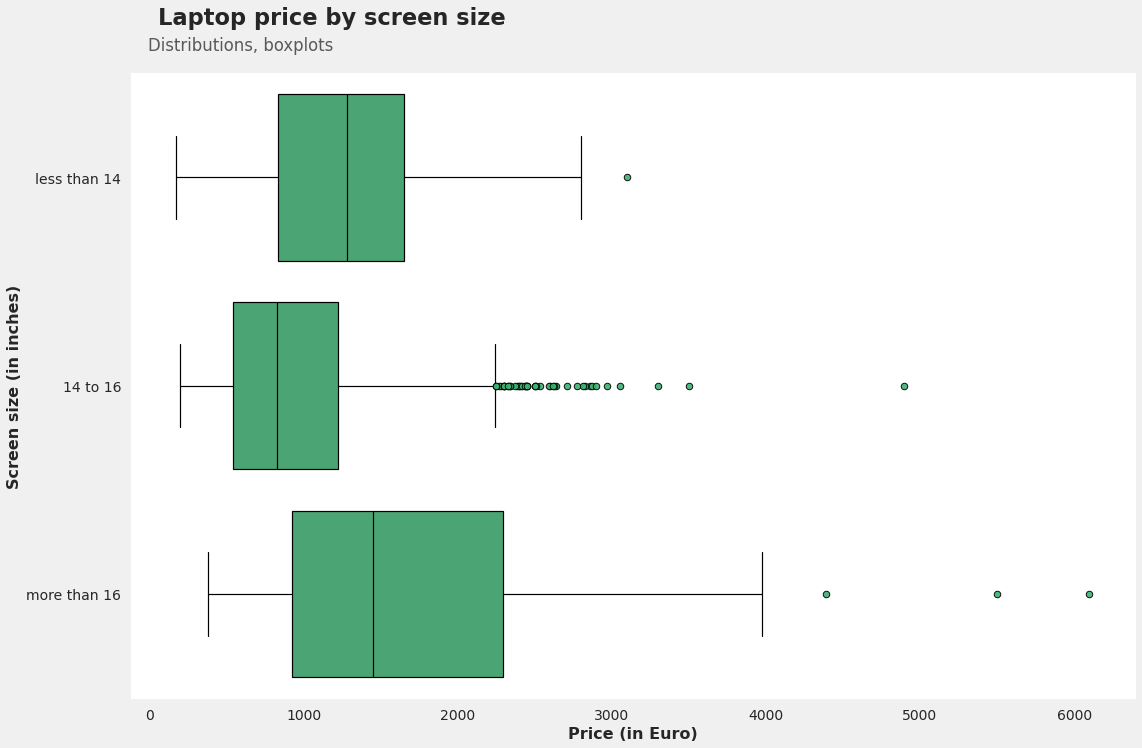

In [9]:
conditions = [
    (df["Inches"].lt(14)),
    (df["Inches"].ge(14) & df["Inches"].lt(16)),
    (df["Inches"].ge(16)),
]
choices = ["less than 14", "14 to 16", "more than 16"]

df["Inches"] = np.select(conditions, choices)

plot_box(x = "Price_euros", y = "Inches", xlabel = 'Price (in Euro)', ylabel = "Screen size (in inches)", title = "Laptop price by screen size",
         subtitle = "Distributions, boxplots", color = "mediumseagreen", order = ["less than 14", "14 to 16", "more than 16"], title_position = 0.2,
         subtitle_position = 0.11)

The screen size is another factor that might influence the price of a laptop. Although it is a quantitative variable, most laptops are fixed sizes (e.g. 13.3, 15.6), making it a sequential process. This variable is recoded into three categories: up to 14 inches, between 14 and 16 inches, and over 16 inches, yielding three classes (each of them represents at least 10 percent of the population). It turns out that laptops with screens ranging from 14 to 16 inches had the lowest quadrant distribution values. Laptops with screens larger than 16 inches are the most expensive (right-hand price distribution in this category, which means that we will find a lot of lapots in this category also at low prices).The variable is not a simulator or a destimulant, but appears to have a moderate effect on the model.


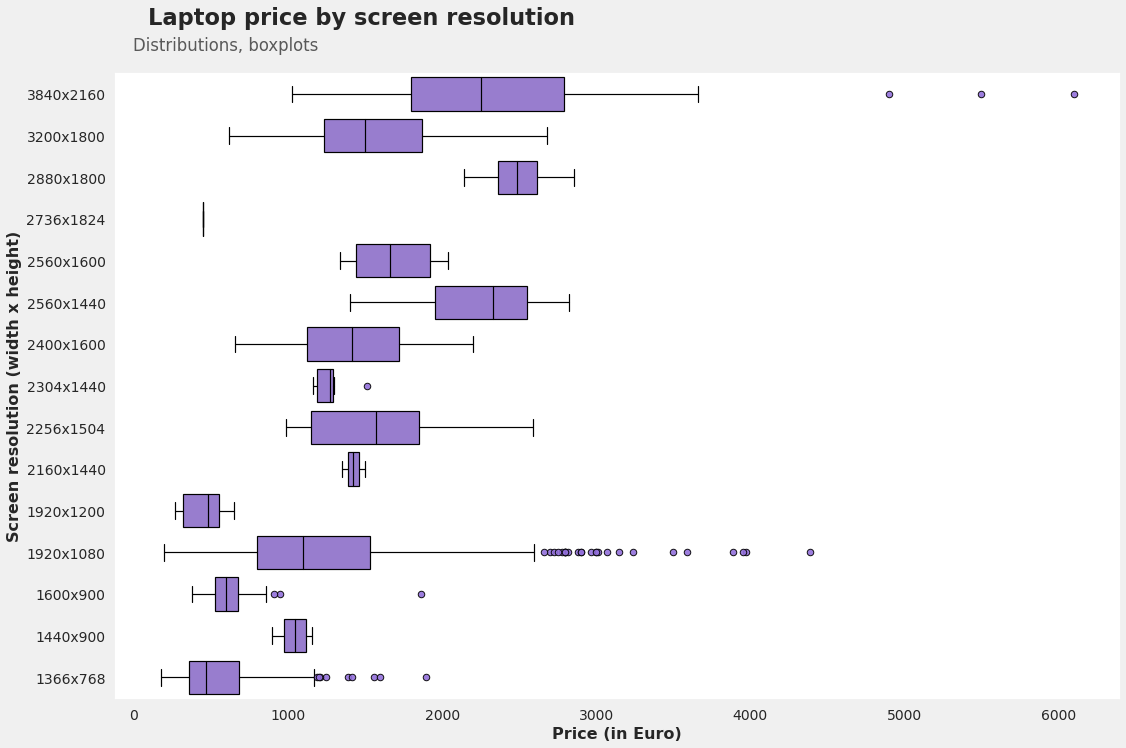

In [10]:
df["ScreenResolution"] = df["ScreenResolution"].astype('string')
df["ScreenResolution"] = df["ScreenResolution"].str.replace('4K', '', regex=True)
df["ScreenResolution"] = df["ScreenResolution"].str.replace('\D', '', regex=True)

def insert_dash(string, index):
    return string[:index] + 'x' + string[index:]

i = 0

for i in range(0,len(df["ScreenResolution"])):
    df["ScreenResolution"][i] = insert_dash(df["ScreenResolution"][i],4)
    i = i +1

plot_box(x = "Price_euros", y = "ScreenResolution", xlabel = 'Price (in Euro)', ylabel = "Screen resolution (width x height)", title = "Laptop price by screen resolution",
         subtitle = "Distributions, boxplots", color = "mediumpurple", title_position = 0.245, subtitle_position = 0.11,
         order = ["3840x2160", "3200x1800", "2880x1800", "2736x1824", "2560x1600", "2560x1440", "2400x1600", "2304x1440", "2256x1504", "2160x1440", 
                  "1920x1200", "1920x1080","1600x900", "1440x900", "1366x768"])

It's time to think about resolution when it comes to screens. The visual quality depends on the screen's size and shape, but the higher the screen, the better. The resolution is expressed as "Width x Height." 15 alternative resolutions have been chosen from a database of over 1,300 computers, and the price distributions are narrowing. As a result, the intuitive conclusion that a greater screen resolution equals a higher average price is validated (the variable is a stimulant). The most popular resolution is FullHD (1920x1080), and the least expensive resolution is HD (1366x768).


In [11]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

df["ScreenWidth"] = ""

for i in range(0, len(df["ScreenResolution"])):
    df["ScreenWidth"][i] = df["ScreenResolution"][i][:4]
    i = i +1
    
df["ScreenWidth"] = df["ScreenWidth"].astype('int')

df["ScreenHeight"] = ""

for i in range(0, len(df["ScreenResolution"])):
    df["ScreenHeight"][i] = df["ScreenResolution"][i][5:]
    i = i +1
    
df["ScreenHeight"] = df["ScreenHeight"].astype('int')

del df['ScreenResolution']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We establish two quantitative variables from this category variable: screen resolution width and height. They will be correlated, but they appear to have a greater impact on the model in this form than a qualitative variable with as many as 15 categories.

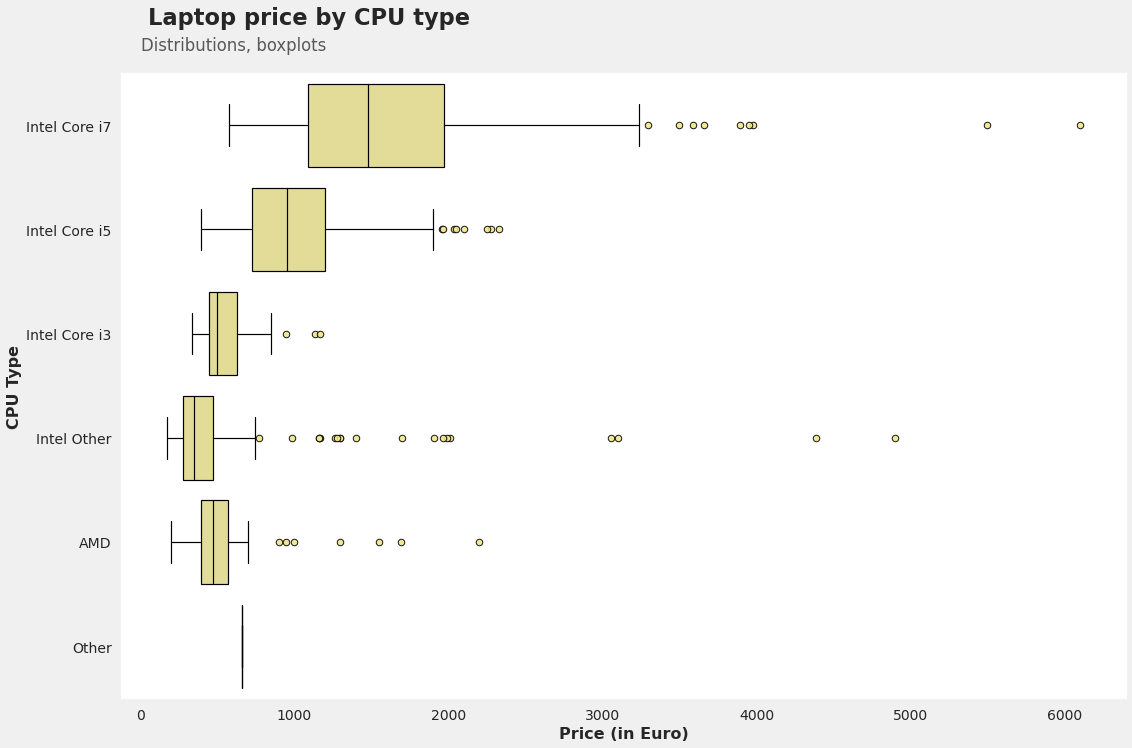

In [12]:
df['Cpu'] = df['Cpu'].replace(['Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz', 'Intel Core i7 6920HQ 2.9GHz',
                              'Intel Core i7 2.7GHz', 'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i7 6560U 2.2GHz',
                              'Intel Core i7 2.9GHz', 'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 7600U 2.8GHz', 'Intel Core i7 6820HK 2.7GHz',
                              'Intel Core i7 7820HK 2.9GHz', 'Intel Core i7 6820HQ 2.7GHz', 'Intel Core i7 7Y75 1.3GHz', 'Intel Core i7 7820HQ 2.9GHz',
                              'Intel Core i7 7660U 2.5GHz', 'Intel Core i7 6500U 2.50GHz', 'Intel Core i7 7500U 2.5GHz', 'Intel Core i7 2.2GHz', 'Intel Core i7 2.8GHz',
                              'Intel Core i7 7560U 2.4GHz', 'Intel Core i7 8650U 1.9GHz', 'Intel Core i7 7700HQ 2.7GHz'], 'Intel Core i7')
df['Cpu'] = df['Cpu'].replace(['Intel Core i5 7200U 2.5GHz', 'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 7200U 2.50GHz', 'Intel Core i5 2.9GHz', 'Intel Core i5 7300U 2.6GHz',
                              'Intel Core i5 6440HQ 2.6GHz', 'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 2.0GHz', 'Intel Core i5 6300U 2.4GHz',
                              'Intel Core i5 6300HQ 2.3GHz', 'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i5 7Y54 1.2GHz', 'Intel Core i5 1.6GHz', 'Intel Core i5 1.8GHz',
                              'Intel Core i5 3.1GHz', 'Intel Core i5 1.3GHz', 'Intel Core i5 7200U 2.7GHz', 'Intel Core i5 2.3GHz', 'Intel Core i5 7Y57 1.2GHz',
                              'Intel Core i5 6260U 1.8GHz', 'Intel Core i5 7500U 2.7GHz', 'Intel Core i5 7200U 2.70GHz'], 'Intel Core i5')
df['Cpu'] = df['Cpu'].replace(['Intel Core i3 6006U 2GHz', 'Intel Core i3 7100U 2.4GHz', 'Intel Core i3 6006U 2.0GHz', 'Intel Core i3 6100U 2.3GHz', 'Intel Core i3 7130U 2.7GHz',
                              'Intel Core i3 6100U 2.1GHz', 'Intel Core i3 6006U 2.2GHz'], 'Intel Core i3')
df['Cpu'] = df['Cpu'].replace(['Intel Pentium Dual Core 4405U 2.1GHz', 'Intel Core M m3-7Y30 2.2GHz', 'Intel Core M 7Y30 1.0GHz', 'Intel Core M 6Y54 1.1GHz',
                              'Intel Pentium Dual Core N4200 1.1GHz', 'Intel Celeron Quad Core N3710 1.6GHz', 'Intel Core M M3-6Y30 0.9GHz', 'Intel Celeron Dual Core N3350 1.1GHz',
                              'Intel Atom Z8350 1.92GHz', 'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Pentium Quad Core N4200 1.1GHz',
                              'Intel Pentium Quad Core N3710 1.6GHz', 'Intel Celeron Dual Core N3050 1.6GHz', 'Intel Celeron Quad Core N3450 1.1GHz',
                              'Intel Atom x5-Z8350 1.44GHz', 'Intel Core M 6Y75 1.2GHz', 'Intel Celeron Dual Core 3205U 1.5GHz', 'Intel Atom x5-Z8550 1.44GHz',
                              'Intel Celeron Dual Core 3855U 1.6GHz', 'Intel Core M 6Y30 0.9GHz', 'Intel Xeon E3-1505M V6 3GHz', 'Intel Core M 1.2GHz',
                              'Intel Pentium Quad Core N3700 1.6GHz', 'Intel Celeron Dual Core N3060 1.60GHz', 'Intel Core M m7-6Y75 1.2GHz', 'Intel Celeron Dual Core N3350 2.0GHz',
                              'Intel Atom x5-Z8300 1.44GHz', 'Intel Core M m3 1.2GHz', 'Intel Xeon E3-1535M v5 2.9GHz', 'Intel Celeron Dual Core N3350 2GHz',
                              'Intel Atom X5-Z8350 1.44GHz', 'Intel Core M M7-6Y75 1.2GHz', 'Intel Xeon E3-1535M v6 3.1GHz', 'Intel Pentium Dual Core 4405Y 1.5GHz',
                              'Intel Core M 1.1GHz', 'Intel Celeron Quad Core N3160 1.6GHz'], 'Intel Other')
df['Cpu'] = df['Cpu'].replace(['AMD E-Series 9000e 1.5GHz', 'AMD E-Series E2-6110 1.5GHz', 'AMD E-Series 9000 2.2GHz', 'AMD Ryzen 1600 3.2GHz', 'AMD A9-Series 9420 3GHz',
                              'AMD A6-Series 9220 2.5GHz', 'AMD A12-Series 9720P 3.6GHz', 'AMD A8-Series 7410 2.2GHz', 'AMD A9-Series 9410 2.9GHz', 'AMD Ryzen 1700 3GHz',
                              'AMD A12-Series 9700P 2.5GHz', 'AMD A4-Series 7210 2.2GHz', 'AMD FX 9830P 3GHz', 'AMD E-Series E2-9000 2.2GHz', 'AMD A6-Series 7310 2GHz',
                              'AMD E-Series 6110 1.5GHz', 'AMD A9-Series A9-9420 3GHz', 'AMD A12-Series 9720P 2.7GHz', 'AMD E-Series 7110 1.8GHz', 'AMD FX 8800P 2.1GHz',
                              'AMD A6-Series 9220 2.9GHz', 'AMD A9-Series 9420 2.9GHz', 'AMD A10-Series 9600P 2.4GHz', 'AMD E-Series E2-9000e 1.5GHz', 'AMD A10-Series A10-9620P 2.5GHz',
                              'AMD A6-Series A6-9220 2.5GHz', 'AMD A10-Series 9620P 2.5GHz'], 'AMD')
df['Cpu'] = df['Cpu'].replace(['Samsung Cortex A72&A53 2.0GHz'], 'Other')

plot_box(x = "Price_euros", y = "Cpu", xlabel = 'Price (in Euro)', ylabel = "CPU Type", title = "Laptop price by CPU type",
         subtitle = "Distributions, boxplots", color = "khaki", title_position = 0.187, subtitle_position = 0.112, 
         order = ["Intel Core i7", "Intel Core i5", "Intel Core i3", "Intel Other", "AMD", "Other"])

I next move on to one of the most critical laptop components, the processor. Because there are so many process models in the database, we classified them into six groups: for Intel processors, four categories were developed based on the model: i7, i5, i3, and everything else. The fifth group includes AMD movie processors, as well as more recently others, such as one laptop with a Samsung CPU. Laptops with an Intel Core i7 processor cost the most on average, followed by laptops with an Intel Core i5. The Intel Core i3 and AMD processors are relatively inexpensive, while the rest of the intera, such as the Pentium or Celeron, are much less so. As laptops differ in prices and this is one of the most important elements of this equipment, we suspect that the variable will have an impact on the model.


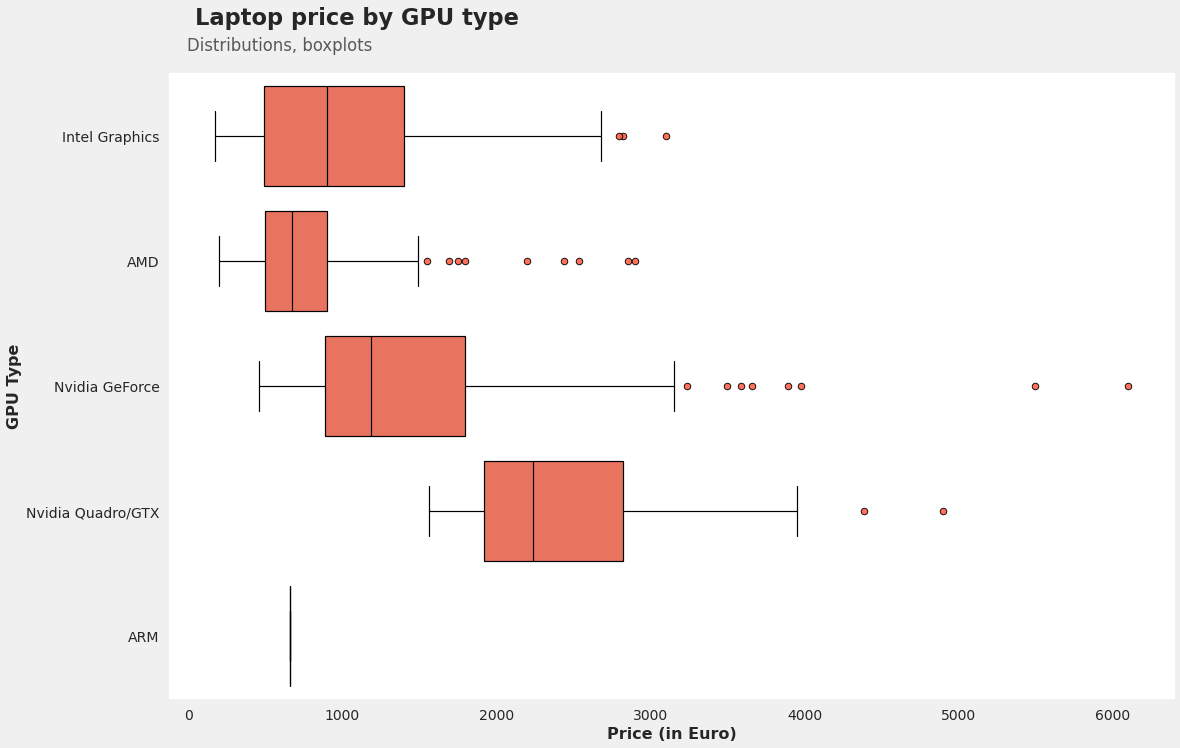

In [13]:
df['Gpu'] = df['Gpu'].replace(['Nvidia GeForce GTX 1050', 'Nvidia GeForce GTX 1060', 'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
                               'Nvidia GeForce 930MX', 'Nvidia GeForce MX150', 'Nvidia GeForce GTX 960M', 'Nvidia GeForce 920MX', 'Nvidia GeForce GTX 980M', 'Nvidia GeForce GTX 950M',
                               'Nvidia GeForce 930M', 'Nvidia GeForce 920M', 'Nvidia GeForce MX130', 'Nvidia GeForce GTX 1080', 'Nvidia GeForce 920MX', 'Nvidia GeForce 930MX',
                               'Nvidia GeForce GTX 970M', 'Nvidia GeForce GT 940MX', 'Nvidia GeForce GTX 965M', 'Nvidia GeForce 920MX', 'Nvidia GeForce 930MX', 'Nvidia GeForce GTX 940MX',
                               'Nvidia GeForce GTX 1050M', 'Nvidia GeForce 150MX', 'Nvidia GeForce GTX 1050Ti', 'Nvidia GeForce GTX 960', 'Nvidia GeForce GTX 960<U+039C>',
                               'Nvidia GeForce GTX1050 Ti', 'Nvidia GeForce GTX1080', 'Nvidia GeForce 920', 'Nvidia GeForce GTX 980', 'Nvidia GeForce 930MX', 'Nvidia GeForce 960M',
                               'Nvidia GeForce 920MX', 'Nvidia GeForce 940M', 'Nvidia GeForce GTX 980', 'Nvidia GeForce GTX 1070M', 'Nvidia GeForce GTX 930MX', 'Nvidia GeForce GTX1060',
                               'Nvidia GeForce GTX 940M', 'Nvidia GeForce 930MX ', 'Nvidia GeForce 920MX', 'Nvidia GeForce GTX 980',  'Nvidia GeForce 920MX ', 'Nvidia GeForce GTX 980 '], 'Nvidia GeForce')
df['Gpu'] = df['Gpu'].replace(['Nvidia Quadro M1200', 'Nvidia Quadro M620', 'Nvidia Quadro M1000M', 'Nvidia Quadro M2200M', 'Nvidia Quadro M2200', 'Nvidia Quadro M520M', 
                               'Nvidia Quadro M2000M', 'Nvidia Quadro M3000M', 'Nvidia Quadro M620M', 'Nvidia GTX 980 SLI', 'Nvidia Quadro 3000M', 'Nvidia Quadro M500M'], 'Nvidia Quadro/GTX')
df['Gpu'] = df['Gpu'].replace(['Intel HD Graphics 620', 'Intel HD Graphics 520', 'Intel UHD Graphics 620', 'Intel HD Graphics 500', 'Intel HD Graphics 400', 'Intel Iris Graphics 540',
                               'Intel HD Graphics', 'Intel HD Graphics 515', 'Intel HD Graphics 615', 'Intel HD Graphics 505', 'Intel HD Graphics 405', 'Intel Iris Plus Graphics 640',
                               'Intel HD Graphics 6000', 'Intel HD Graphics 510', 'Intel HD Graphics 630', 'Intel HD Graphics 5300', 'Intel Iris Plus Graphics 650', 'Intel HD Graphics 620',
                               'Intel Iris Graphics 550', 'Intel Iris Pro Graphics', 'Intel Graphics 620', 'Intel HD Graphics 620', 'Intel HD Graphics 540', 'Intel HD Graphics 530', 
                               'Intel HD Graphics 620', 'Intel HD Graphics 620 '], 'Intel Graphics')
df['Gpu'] = df['Gpu'].replace(['AMD Radeon 530', 'AMD Radeon R5 M430', 'AMD Radeon 520', 'AMD Radeon R7 M445', 'AMD Radeon R5', 'AMD Radeon R5 M420', 'AMD Radeon R5 M330',
                               'AMD Radeon R2', 'AMD Radeon R4 Graphics', 'AMD Radeon RX 580', 'AMD Radeon R7 M440', 'AMD Radeon RX 550', 'AMD Radeon R2 Graphics', 'AMD Radeon R5 M420X',
                               'AMD Radeon R4', 'AMD Radeon RX 540', 'AMD Radeon R7 M460', 'AMD FirePro W4190M', 'AMD Radeon R7 M360', 'AMD Radeon 540', 'AMD FirePro W4190M',
                               'AMD Radeon R7 Graphics', 'AMD Radeon Pro 560', 'AMD Radeon R7', 'AMD Radeon RX 560', 'AMD Radeon Pro 455', 'AMD FirePro W6150M', 'AMD Radeon R3',
                               'AMD R4 Graphics', 'AMD Radeon Pro 555', 'AMD Radeon R5 430', 'AMD Radeon R7 M465', 'AMD R17M-M1-70', 'AMD Radeon R5 M315', 'AMD Radeon R7 M365X',
                               'AMD Radeon R9 M385', 'AMD FirePro W5130M', 'AMD Radeon R5 520', 'AMD FirePro W4190M '], 'AMD')
df['Gpu'] = df['Gpu'].replace(['ARM Mali T860 MP4'], 'ARM')


plot_box(x = "Price_euros", y = "Gpu", xlabel = 'Price (in Euro)', ylabel = "GPU Type", title = "Laptop price by GPU type",
         subtitle = "Distributions, boxplots", color = "tomato", title_position = 0.187, subtitle_position = 0.11)


Now that I've got a CPU, it's time to move on to another crucial component: the GPU. I suspect a significant impact on the model, similar to processors, and I have a large number of variable levels that require recoding to make the variables functional. Intel Graphics, i.e. Windows built-in graphics, AMD cards, Nvidia GeForce cards, additional Nvidia cards (primarily Quadro), and ARM, which has only one laptop, are the four types of graphics cards. Nvidia cards, primarily Quadro and newer versions of GeForce, are found in the most costly laptops, whereas AMD graphics are found in the least priced. he variable will affect the model, but due to grouping to simplify model construction, we lose a lot of information, but the variable seems to be very useful anyway.

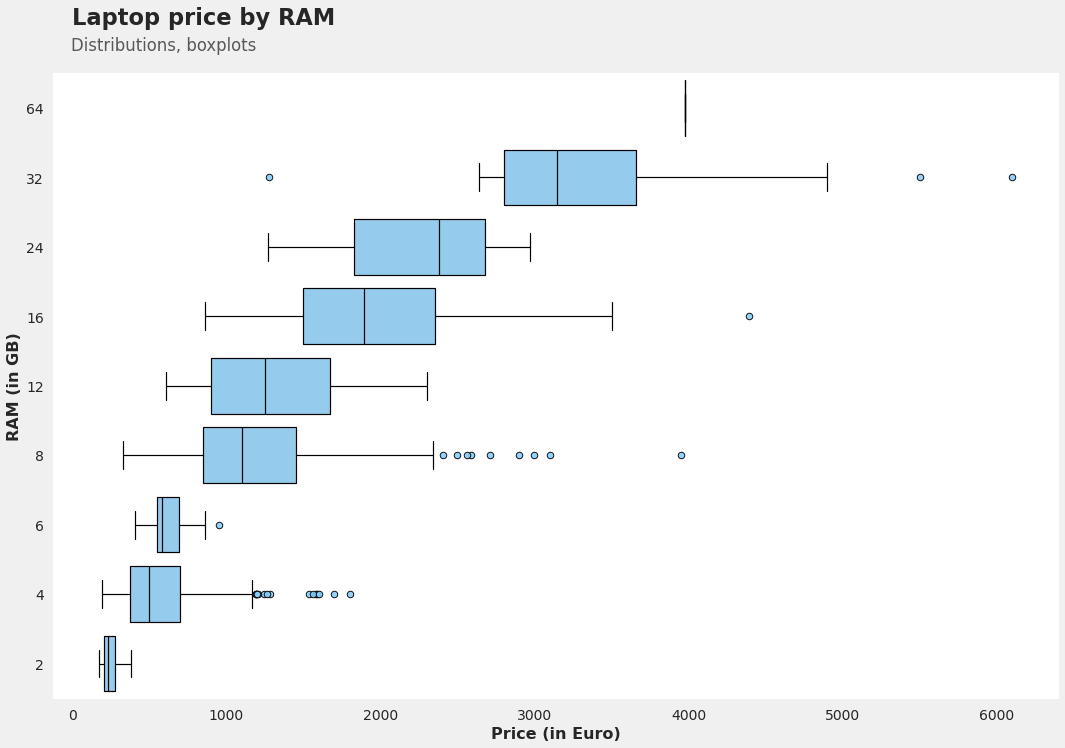

In [14]:

df["Ram"] = df["Ram"].str.replace('\D', '', regex=True)

plot_box(x = "Price_euros", y = "Ram", xlabel = 'Price (in Euro)', ylabel = "RAM (in GB)", title = "Laptop price by RAM",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.15, subtitle_position = 0.11,
         order = ["64", "32", "24", "16", "12", "8", "6", "4", "2"])

df["Ram"] = df["Ram"].astype('int')

Now it's RAM's turn. It's energizing because the more RAM you have, the faster and more expensive your system will be. Laptops with 2 to 64 GB of memory are included in the database, which is separated into 9 groups. For each of these categories, a box plot was created and sorted in descending order. Conclusion: As the amount of RAM in a laptop lowers, the price of the notebook decreases. I won't find any laptop that costs more than 2000 euros with less than 8 GB of RAM, but I won't find any that costs less than 2000 euros with more than 16 GB. As a result, the variable will have an impact on the price; the question is how much.

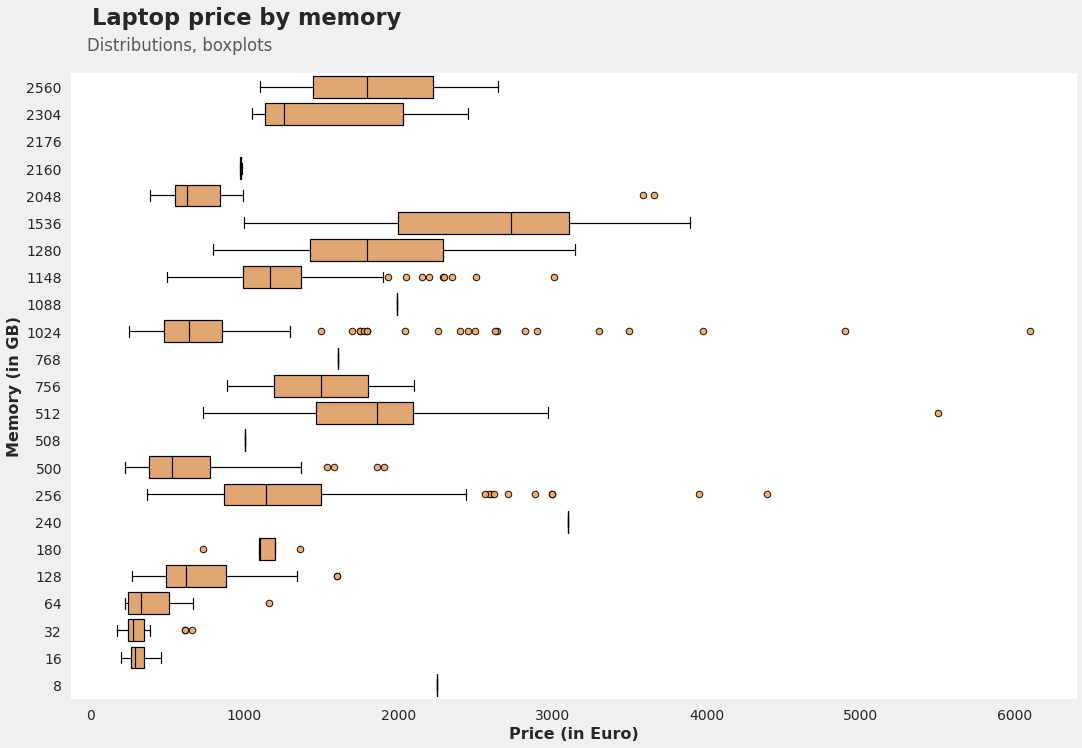

In [15]:
df['Memory'] = df['Memory'].replace(['128GB SSD', '128GB Flash Storage', '128GB HDD'], '128')
df['Memory'] = df['Memory'].replace(['256GB SSD', '256GB Flash Storage'], '256')
df['Memory'] = df['Memory'].replace(['512GB SSD', '256GB SSD +  256GB SSD', '512GB Flash Storage'], '512')
df['Memory'] = df['Memory'].replace(['500GB HDD'], '500')
df['Memory'] = df['Memory'].replace(['1TB HDD', '1TB SSD', '1.0TB Hybrid', '512GB SSD +  512GB SSD', '1.0TB HDD'], '1024')
df['Memory'] = df['Memory'].replace(['2TB HDD', '1TB SSD +  1TB HDD', '1TB HDD +  1TB HDD',], '2048')
df['Memory'] = df['Memory'].replace(['128GB SSD +  2TB HDD'], '2160')
df['Memory'] = df['Memory'].replace(['32GB Flash Storage', '32GB SSD', '32GB HDD'], '32')
df['Memory'] = df['Memory'].replace(['256GB SSD +  500GB HDD'], '756')
df['Memory'] = df['Memory'].replace(['16GB Flash Storage', '16GB SSD'], '16')
df['Memory'] = df['Memory'].replace(['128GB SSD +  1TB HDD'], '1148')
df['Memory'] = df['Memory'].replace(['64GB Flash Storage', '64GB SSD'], '64')
df['Memory'] = df['Memory'].replace(['180GB SSD'], '180')
df['Memory'] = df['Memory'].replace(['240GB SSD'], '240')
df['Memory'] = df['Memory'].replace(['512GB SSD +  256GB SSD'], '768')
df['Memory'] = df['Memory'].replace(['256GB SSD +  1TB HDD', '256GB SSD +  1.0TB Hybrid'], '1280')
df['Memory'] = df['Memory'].replace(['512GB SSD +  1TB HDD', '512GB SSD +  1.0TB Hybrid'], '1536')
df['Memory'] = df['Memory'].replace(['256GB SSD +  2TB HDD'], '2304')
df['Memory'] = df['Memory'].replace(['128GB SSD +  2TB HDD'], '2176')
df['Memory'] = df['Memory'].replace(['512GB SSD +  2TB HDD'], '2560')
df['Memory'] = df['Memory'].replace(['8GB SSD'], '8')
df['Memory'] = df['Memory'].replace(['508GB Hybrid'], '508')
df['Memory'] = df['Memory'].replace(['64GB Flash Storage +  1TB HDD'], '1088')

plot_box(x = "Price_euros", y = "Memory", xlabel = 'Price (in Euro)', ylabel = "Memory (in GB)", title = "Laptop price by memory",
         subtitle = "Distributions, boxplots", color = "sandybrown", title_position = 0.175, subtitle_position = 0.108,
         order = ["2560", "2304", "2176", "2160", "2048", "1536", "1280", "1148", "1088", "1024", "768", "756", "512", "508", "500", "256", "240", "180", "128", "64", "32", "16", "8"])

df["Memory"] = df["Memory"].astype('int')

The next variable is the memory that is saved on discs in the same way that RAM is. I add up the entire memory on the discs in each laptop (since some laptops have SSD and HDD discs at the same time) and construct a variable quantity that corresponds to the memory expressed in GB for each device. The shooting is lightning fast, with memory ranging from 8GB to 2.5TB. The variable is unquestionably a stimulant; I want high values of this variable, which influences the laptop's pricing. The graph confirms this, but because the "jumps" between the data are irregular, it's difficult to identify what the relationship is. Most laptops have 1 TB or 256 GB of memory, and the variable seems to have a similar effect on modeling as RAM.

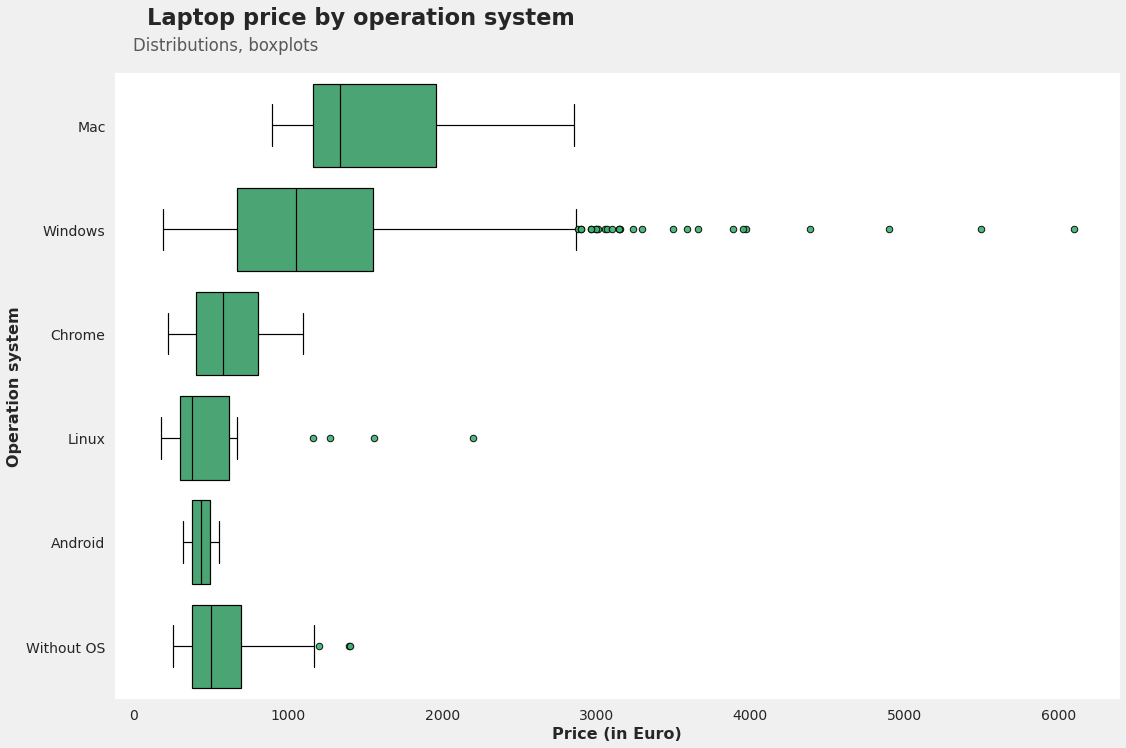

In [16]:
df['OpSys'] = np.select(
       [df['OpSys'].isin(["macOS", "Mac OS X"]), 
        df['OpSys'].isin(["Windows 10", "Windows 7", 'Windows 10 S']),
        df['OpSys'].isin(["Chrome OS"]),
        df['OpSys'].isin(["Linux"]),
        df['OpSys'].isin(["Android"]),
        df['OpSys'].isin(["No OS"])], 
        ['Mac', 'Windows', 'Linux', 'Chrome', 'Android', 'Without OS'], 
    default = 'Unknown')

plot_box(x = "Price_euros", y = "OpSys", xlabel = 'Price (in Euro)', ylabel = "Operation system", title = "Laptop price by operation system",
         subtitle = "Distributions, boxplots", color = "mediumseagreen", order = ['Mac', 'Windows', 'Chrome', 'Linux', 'Android', 'Without OS'],
         title_position = 0.245, subtitle_position = 0.11)

The operating system will be the second last variable to be considered. The variable is divided into six categories: Mac, Windows, Linux, Chrome, Android, and Without OS, with Windows accounting for the majority of laptops. A box plot of the price distribution was created for each of the categories. Laptops using the Mac operating system have the highest median price, while laptops with Linux have the lowest (interestingly even lower than laptops without any system installed). Variables may have a minor impact on the model, as Windows laptops, which make up the majority of the population, have a price distribution that is relatively comparable to the whole population.

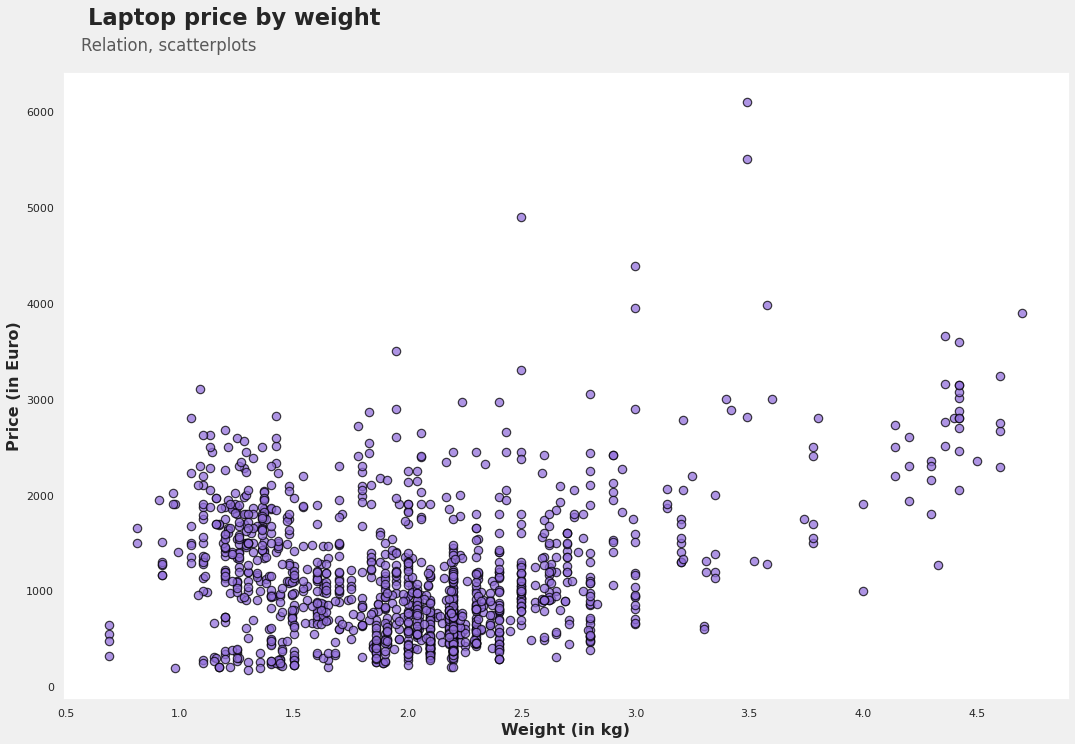

In [17]:
df["Weight"] = df["Weight"].str.extract('(\d*\.?\d*)', expand=False).astype(float)

plot_scatter(x = "Weight", y = "Price_euros", ylabel = 'Price (in Euro)', xlabel = "Weight (in kg)", title = "Laptop price by weight",subtitle = "Relation, scatterplots", color = "mediumpurple", title_position = 0.17, subtitle_position = 0.105, size = 70, alpha = 0.75)

The laptop's weight will be the final variable. I primarily want the laptop to be as light as possible, but high-quality components, such as a good graphics card and hard discs, increase the laptop's weight. As a result, it's difficult to identify whether this shift is stimulant or destimulant, therefore we make a scatter plot and compare the two quantitative qualities. It's difficult to detect a clear link between these traits, but we can observe that laptops weighing more than 3.5 kg (i.e. heavy) cost more than others. The cheapest computers are average weight, weighing roughly 2 kg. There is certainly no linear relationship here, the variable may have some influence on the price, but it seems that in connection with the first task, these may be apparent correlations.

# Modeling
We now go on to the modeling stage, after the data has been pre-analyzed. The model will be a neural network, and the whole thing will be done with the Tensorflow and Keras tools. However, before I can utilize the data in models, I must recode category variables into l-1 binary variables, where l is the number of levels in the variable. These are dummy variables; when the laptop has the feature mentioned in the new variable, the value 1 appears for each level.

In [18]:
df = df.drop(columns = ['laptop_ID', 'Product'])

df_dummy = pd.get_dummies(df, columns = ['Company', 'TypeName', "Inches", 'Cpu', 'Gpu', 'OpSys'])
df = df.merge(df_dummy, left_index = False, right_index = False)

df = df.drop(columns = ['Company', 'TypeName', "Inches", 'Cpu', 'Gpu', 'OpSys'])
print("Shapes of model database: ", df.shape)

Shapes of model database:  (1415, 51)


There are 1415 lines in the model and 51 variables (50 explained in a quantitative or zero-one form and an explanatory price). The algorithm's ability to learn database dependencies on such a small sample appears to be hampered by the small number of lines. After that, we'll divide the set into training and testing.

In [19]:
X = df.drop(columns = ['Price_euros'])
Y = df['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

The set is divided into three parts in a 3:1 ratio (75 percent of cases are randomly placed in the training set, and the remaining 25 percent is the test set). This method yielded a training set of 1061 lines and a test set of 354 lines. The next step is to build a neural network.

In [20]:
np.random.seed(123)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def create_model(learn_rate = 0.01, activation = 'relu', neurons = 1):
    model = Sequential()
    model.add(Dense(neurons, input_dim = len(X_train.columns), kernel_initializer = 'normal', activation = activation))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = root_mean_squared_error, optimizer = 'adam')
    return model

My goal is for my neural network model to have the lowest root mean square error possible. Because it doesn't have a specified function, I make it up. After that, I construct a network structure. In the first layer, I set the learning rate, activation function, and number of neurons as variables that I will then optimize. An input layer, a hidden layer with 10 neurons and a ReLU active function, and a final layer with 1 neuron will make up the network. In a function, the entire structure is closed, and the first variables are set.

In [21]:
model = KerasRegressor(build_fn = create_model, verbose = 0)

batch_size = [1, 10, 40, 100]
learn_rate = [0.0001, 0.001, 0.01, 0.05]
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neurons = [64, 128, 256]

param_grid = dict(batch_size = batch_size, learn_rate = learn_rate, activation = activation, neurons = neurons)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


I perform GridSearch on the newly constructed function to reduce errors in the previous model. I'll be looking for four optimal parameters: batch size, learning rate, first-layer activation function, and first-layer number of neurons. Arguments will be found in such a way that the RMSE from 3-fold cross-validation is minimized.

In [22]:
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -403.578929 using {'activation': 'relu', 'batch_size': 1, 'learn_rate': 0.01, 'neurons': 64}


On my network structure, I utilized a parameter search. The best model was one in which the batch size was 1, the learning rate was 0.01, and the ReLU activation function was represented by 64 neurons in the first layer. This function had a root mean square error of roughly 420 euros.

In [23]:
model = Sequential()
model.add(Dense(128, input_dim = len(X_train.columns), kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = root_mean_squared_error, optimizer = 'adam')

I create the final model according to the previously designed network, taking into account the best parameters. For the optimizer I use the "adam" algorithm.

In [24]:
callbacks = [keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 15, verbose = 1)]

history = model.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_split = 0.25, verbose = 0, callbacks = callbacks)

Epoch 68: early stopping


I make adjustments to the model based on the training data. In addition, I generate a validation set by randomly selecting 25% of the cases from the training set. Each epoch will have a bug test to determine when to stop learning. When the algorithm has failed to progress for 15 epochs, the learning process will come to a stop (maximum 500). The model completed training after 68 epochs, allowing for the optimization of one more hyperparameter.

In [25]:
mse_train = model.evaluate(X_train, y_train, verbose = 0)
print("RMSE on train set (in €): " + str(round(mse_train, 0)))

RMSE on train set (in €): 331.0


At the beginning, I check how the model is doing on the test set. I compare the actual price with the forecast price and calculate the RMSE. It amounts to 331 euros, which means that on the training set, the model forecasts price of the laptop with an average error of 331.

In [26]:
y_pred = model.predict(X_test)

mse_test = mean_squared_error(y_pred, y_test)
print("RMSE on test set (in €): ", str(round(mse_test**0.5, 0)))

RMSE on test set (in €):  391.0


However, because the model learned about real prices during the learning process, the inaccuracy of the training set is not objective, so I project the model to the test set. I recalculate the RMSE by comparing the actual price on this set against the anticipated price (which the model has never seen before). It comes to 391 euros, implying that the model correctly predicts the price of the laptop on the test set with an average error of 391 euros.

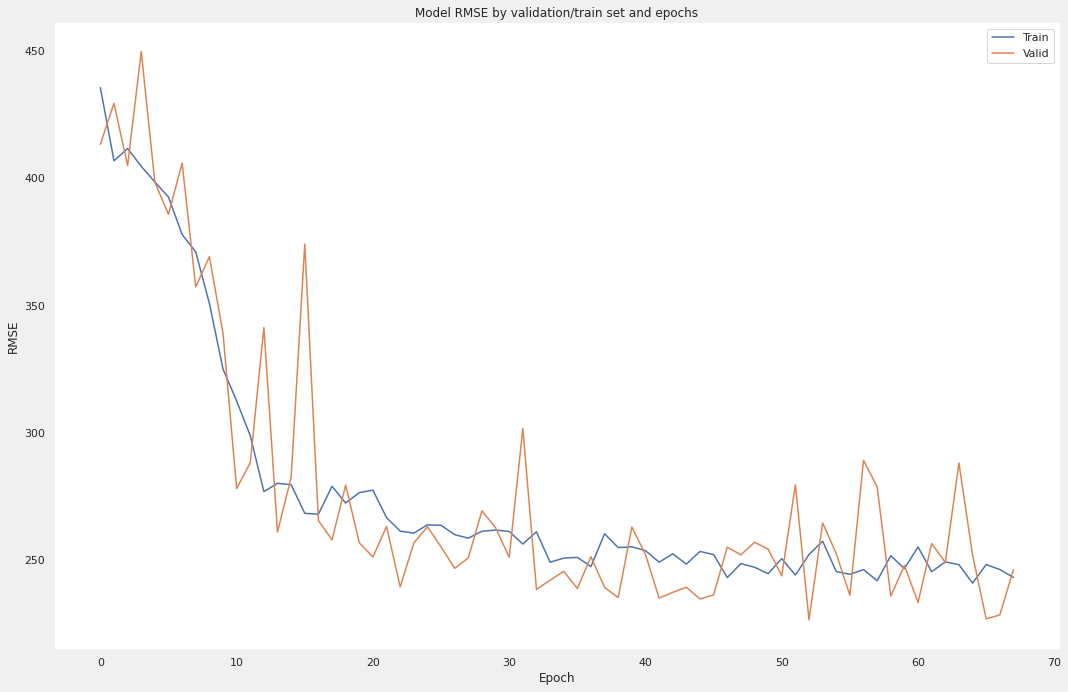

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model RMSE by validation/train set and epochs')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc = 'upper right')
plt.show()

The RMSE on both the training and validation sets declines when more epochs are added, but around 10 epochs, it begins to stabilise and act abnormally on the validation set. I infer that the method is not overfitted because the errors on the training and validation sets are relatively similar.

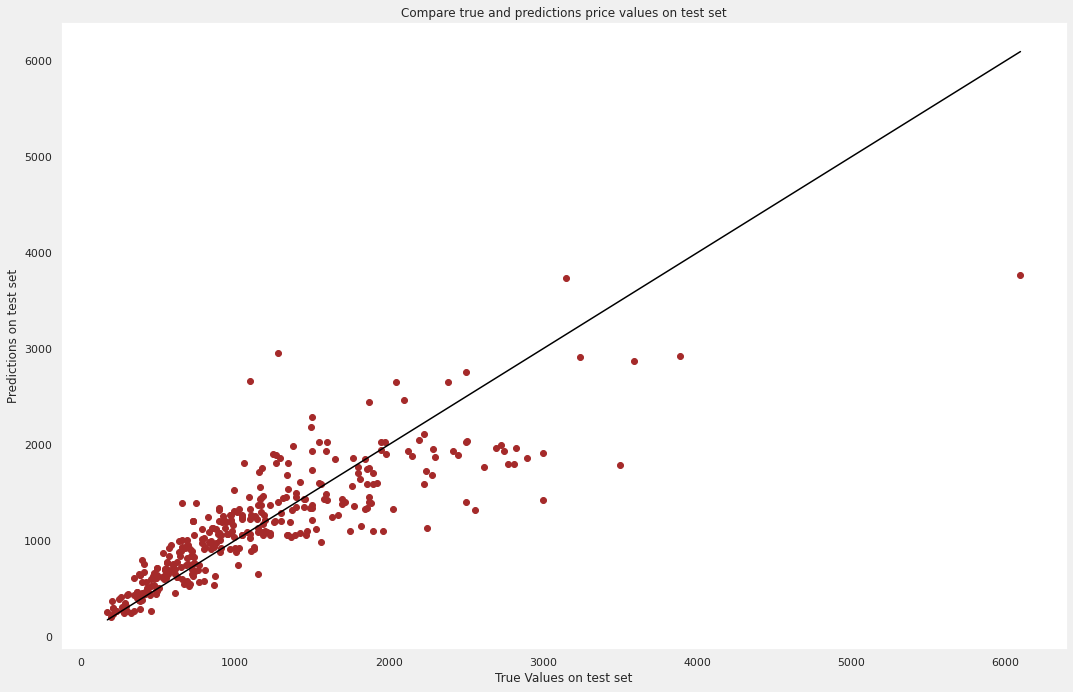

In [28]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'black')

plt.scatter(y_test, y_pred, c = "brown")
plt.title('Compare true and predictions price values on test set')
plt.xlabel('True Values on test set')
plt.ylabel('Predictions on test set')
plt.show()

After that, I use a visual to check the model results on the test set. I show the real values on the X-axis and the model's calculated values on the Y-axis, with the black line representing a perfect match. All of the points (the individual laptops that hit the test set) are around the black line to change over and under, indicating that the model does not have a tendency to overestimate or underestimate the value.

In [29]:
perm = PermutationImportance(model, scoring = 'neg_root_mean_squared_error', random_state = 123).fit(X_train, y_train)
eli5.explain_weights(perm, feature_names = X_train.columns.tolist(), top = 50)

Weight,Feature
185.8184 ± 9.5437,Ram
126.0494 ± 10.3831,ScreenHeight
25.2230 ± 3.9315,Memory
23.9707 ± 2.5485,ScreenWidth
10.2782 ± 2.7407,TypeName_Notebook
7.4060 ± 1.6364,Gpu_Nvidia Quadro/GTX
6.9320 ± 2.5862,Cpu_Intel Core i7
6.3233 ± 1.1554,TypeName_Workstation
4.8898 ± 1.2940,TypeName_Ultrabook
4.2631 ± 1.9114,Cpu_Intel Other


Finally, we look at how variables affect the model. They are reported as mean weights and standard deviations for each variable. As can be seen, RAM has proven to be the most important factor. The model was also influenced by screen resolution (pixel height) and hard memory. Some of the model's variables indicated certain models and operating systems turned out to be useless. The CPU and GPU, in their many forms, were found to have a minor impact (although quite high on the list, the relative impact on the model is small)

# Conclusion:

